# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 1<sup>th </sup> Computational Exercise

In [1]:
### importing useful libraries
import numpy as np
import matplotlib.pyplot as plt

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 16 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,7] # use scientific notation if log10
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = True ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = True
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.4
mpl.rcParams['figure.subplot.hspace'] = 0.4
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

###  <font color="red"> A. Test the Pseudo-Random Number Generator
    
by estimating:

- \begin{equation} \langle r \rangle = \int_0^1 r dr = 1/2 \end{equation}
    

- \begin{equation} \sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12 \end{equation}
    
and by performing the $\chi $-test.

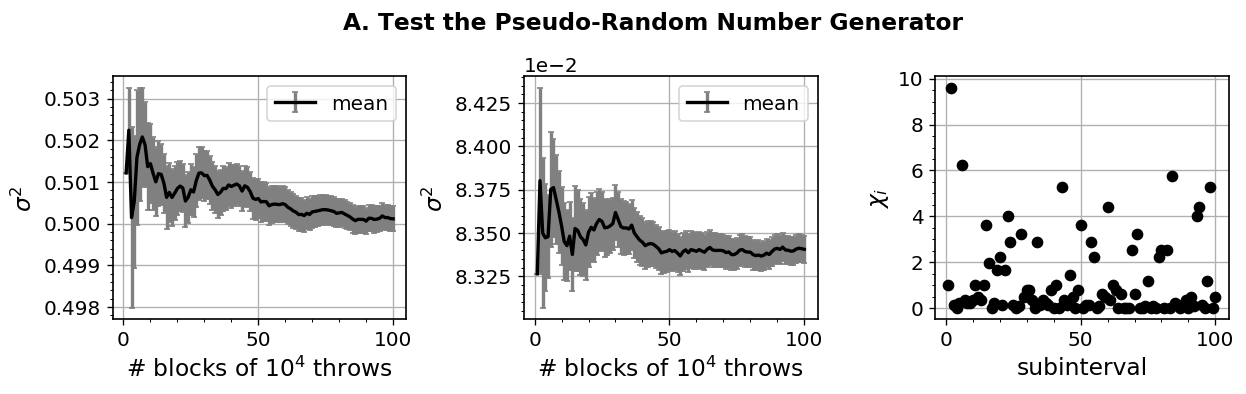

chi quadro =  115.91


In [5]:
nplots = [1, 2, 3]

plt.figure(figsize=(12, 3), dpi=120)
plt.suptitle('A. Test the Pseudo-Random Number Generator', size=14)
mpl.rcParams['figure.subplot.top'] = 0.8
for plot in nplots:
    data = np.loadtxt("data/output{}.txt".format(nplots[plot-1])).T
    block_length = data[0][0]
    plt.subplot(1, 3, plot);
    if(plot != 3):
        plt.errorbar(
            data[0]/block_length,
            data[1],
            yerr=data[2], 
            color = 'black',
            ecolor = 'grey', 
            label = 'mean'
        )
        plt.xlabel('# blocks of $10^4$ throws')
        plt.ylabel('$\sigma^2$')
        plt.legend()
    if(plot == 3):
        plt.plot(data[0],data[1], 'ok')
        plt.xlabel('subinterval')
        plt.ylabel('$\chi_i$')
        
plt.show()
print("chi quadro = ", data[1].sum())

###  <font color="red"> B. Extend the Pseudo-Random Number generator and check the Central Limit Theorem:

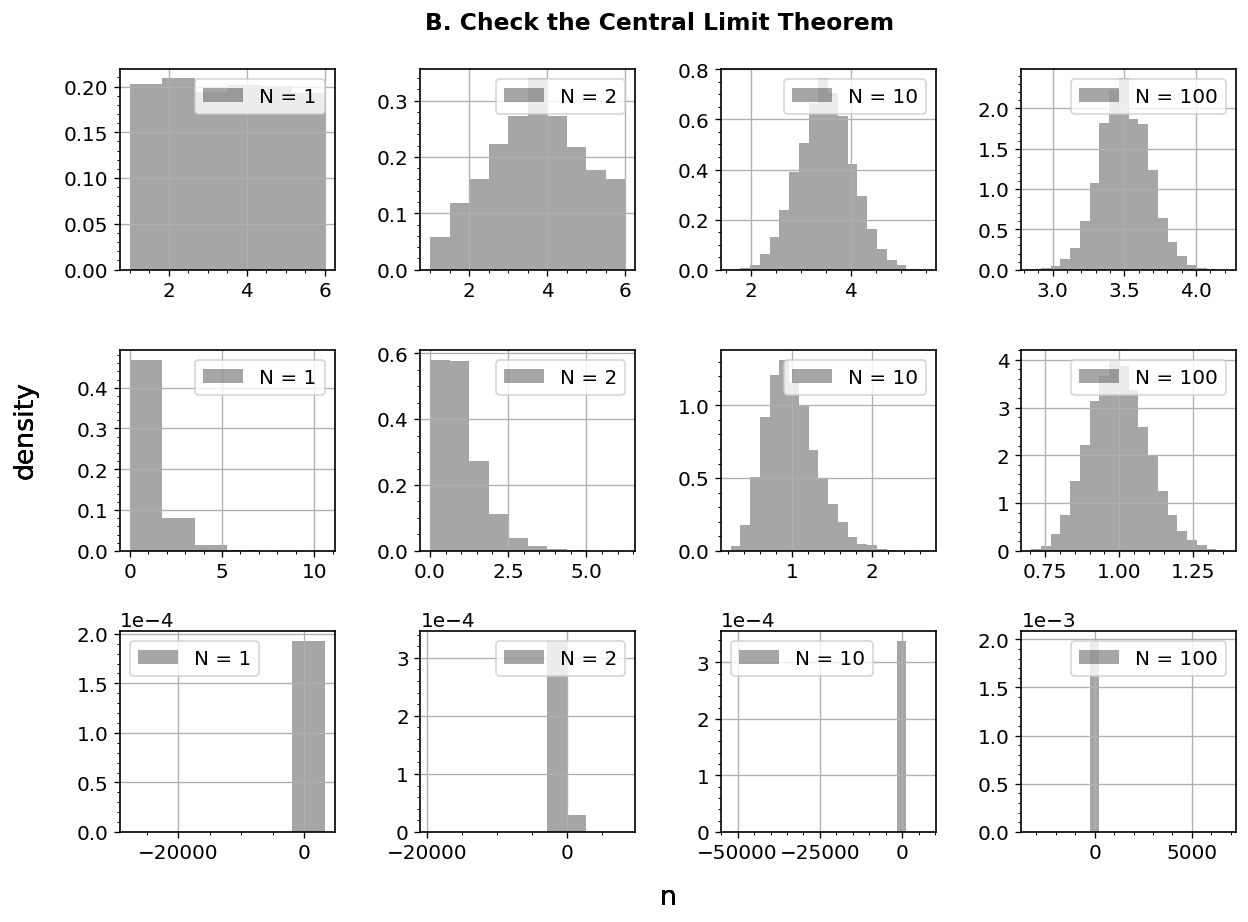

In [9]:
data = np.loadtxt("data/output4.txt").T

labels = [1, 2, 10, 100]*4
bins = [6, 10, 20, 20]*4
plt.figure(figsize=(12, 8), dpi=120)
plt.suptitle('B. Check the Central Limit Theorem', size=14)
mpl.rcParams['figure.subplot.top'] = 0.92
for i in (np.arange(1, 13, 1)) :
    plt.subplot(3, 4, i); 
    plt.hist(
        data[i-1], 
        bins =bins[i-1], 
        color = "black",
        alpha = 0.35,
        density=True, 
        label = "N = {}".format(labels[i-1]))
    plt.legend()
    if(i>8):
        fig = plt.gcf()
        #ax = plt.gca()
        fig.text(0.05, 0.5, "density", size = 16, rotation="vertical")
        fig.text(0.5, 0.05, "n", size = 16)
        
plt.show()

### <font color="red"> C. Simulate the Buffon’s experiment

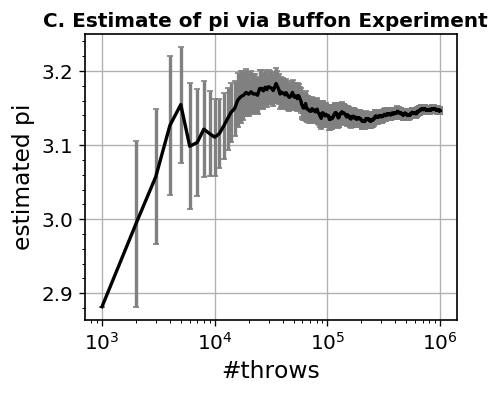

In [10]:
data5 = np.loadtxt("data/output5.txt").T

plt.figure(figsize=(4, 3), dpi=120)
plt.suptitle('C. Estimate of pi via Buffon Experiment', size=12)
plt.errorbar(data5[0],data5[1],yerr=data5[2], color = 'black', ecolor = 'grey')
plt.xlabel('#throws')
plt.ylabel('estimated pi')
plt.semilogx()
plt.grid(True)
plt.show()

The number of blocks has to be chosen so that the estimates of pi within each block are fairly good.
Otherwise, when we mean over this estimates we find a robust estimate (low error) but inaccurate.

It is important to note that altough the inclination angle of the needle $\theta$ is uniformly distributed in $[0, \pi]$ its vertical lenght $y = L\cos \theta$ is not.

Indeed, we have: \begin{align*}
p(y) \Delta y &= \int_{y < f(\theta) < y + \Delta y} dx \ p(x) = \int dx \ p(x) \left[ \theta(y+\Delta y-f(\theta))-\theta(y-f(x)) \right] = \int dx \ p(x) \delta(y-f(x)) \Delta y
\end{align*}

and, using the property $\delta(y-f(x)) = \delta(y-x_0)/|f'(x_0)|$, with $x_0 = \arccos y/L$

\begin{align*} p(y)= \frac{1}{\pi L} \frac{1}{\sin{\arccos(\frac{y}{L})}}\end{align*}

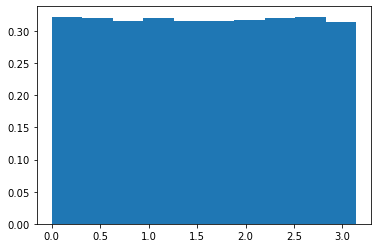

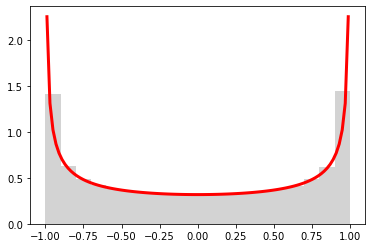

In [30]:
# It is important to note that theta uniform in 0, pi doesn't imply Lcostheta uniform in -L L

theta = np.random.uniform(0., np.pi, 100000)
x = np.linspace(-0.99, 0.99, num = 101)
L =np.cos(theta)
plt.hist(theta, density=True)
plt.show()
plt.hist(L,bins = 20, density=True, color = "lightgrey")
plt.plot(x, 1/(np.pi*1.)*1./np.sin(np.arccos(x)), "r-", lw =3 )
plt.show()

